## Logistic Regression as Neuarl Network

In [26]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

Let's consider cat & non cat dataset to validate our way of creating "Logistic Regression as Neuarl Network"

define filepath, train & test datasets


In [27]:
file_path = r"D:\Data Science\My Deep Learning Lab\Basic Neural Network Creation\Creating Logistic regression in the way of Neural Network\catvnoncat\test_catvnoncat.h5"

train = "train_catvnoncat.h5"

test = "test_catvnoncat.h5"

In [28]:
train = h5py.File(r"D:\Data Science\My Deep Learning Lab\Basic Neural Network Creation\Creating Logistic regression in the way of Neural Network\train_catvnoncat.h5", 'r')
list(train.keys())


['list_classes', 'train_set_x', 'train_set_y']

In [29]:
test = h5py.File(r"D:\Data Science\My Deep Learning Lab\Basic Neural Network Creation\Creating Logistic regression in the way of Neural Network\test_catvnoncat.h5", 'r')
list(test.keys())

['list_classes', 'test_set_x', 'test_set_y']

In [30]:
#read trainset & testset
train_set_x=train["train_set_x"]

train_set_y=train["train_set_y"]


test_set_x = test["test_set_x"]

test_set_y = test["test_set_y"]



In [31]:
train_list_classes = train["list_classes"]

In [49]:
test_set_y

<HDF5 dataset "test_set_y": shape (50,), type "<i8">

In [32]:
##lets l;ook lables in train 
print("Lables in train set:")
for label in train_list_classes:
    print(label.decode('utf-8')) 

Lables in train set:
non-cat
cat


Lets' look few example of picture

In [33]:
#a function to check image with classes
def view_pic(x, y, clasess, index):
    plt.imshow(x[index])
    print(f"y={index}, it's {clasess[np.squeeze(y[index])].decode('utf-8')} picture")

y=27, it's cat picture


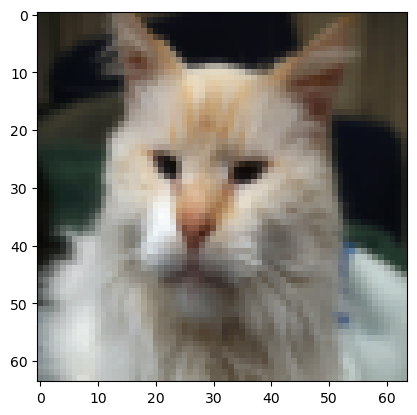

In [34]:
view_pic(train_set_x, train_set_y, train_list_classes, 27)

y=10, it's non-cat picture


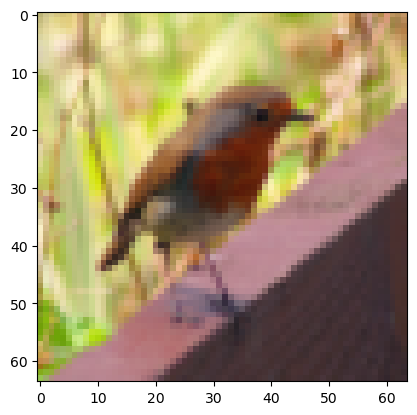

In [35]:
view_pic(train_set_x, train_set_y, train_list_classes, 10)

In [36]:
#lets check shape of tran, test data
train_set_x.shape

(209, 64, 64, 3)

In [37]:
def data_shape(data):
    print(f"Shape of {data} is {data.shape}")
    print(f"Number of examples in data is {data.shape[0]}")
    print("height and width is,", (data.shape[1], data.shape[2]))
    print(f"number of channels are {data.shape[2]}")
    print("Each image size is",(data.shape[1], data.shape[2], data.shape[3]))

    m  = data.shape[0]
    num_px = data.shape[1]

    return m , num_px

In [38]:
m_train , num_px = data_shape(train_set_x)

Shape of <HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1"> is (209, 64, 64, 3)
Number of examples in data is 209
height and width is, (64, 64)
number of channels are 64
Each image size is (64, 64, 3)


In [39]:
m_train

209

In [40]:
num_px

64

In [41]:
m_test , num_px = data_shape(test_set_x)

Shape of <HDF5 dataset "test_set_x": shape (50, 64, 64, 3), type "|u1"> is (50, 64, 64, 3)
Number of examples in data is 50
height and width is, (64, 64)
number of channels are 64
Each image size is (64, 64, 3)


In [42]:
data_shape(test_set_x)

Shape of <HDF5 dataset "test_set_x": shape (50, 64, 64, 3), type "|u1"> is (50, 64, 64, 3)
Number of examples in data is 50
height and width is, (64, 64)
number of channels are 64
Each image size is (64, 64, 3)


(50, 64)

In [50]:
test_set_y.shape

(50,)

In [52]:
train_set_y.shape

(209,)

In [44]:
m_test

50

In [45]:
num_px

64

Reshape the data:

reshape of the data single vector shape by multiplying image size 

In [87]:
x_train = train_set_x[()].reshape(train_set_x.shape[0], -1).T
x_train.shape

(12288, 209)

In [88]:
y_train = train_set_y[()].reshape(train_set_y.shape[0], -1).T
y_train.shape

(1, 209)

In [90]:
x_test = test_set_x[()].reshape(test_set_x.shape[0], -1).T
x_test.shape

(12288, 50)

In [91]:
y_test = test_set_y[()].reshape(test_set_y.shape[0],-1).T
y_test.shape

(1, 50)

**Preprocessing/Standardizing data set**

RGB pixel values ranging from 0 to 255, so we need to normalize our data first , let's devide by 255, then it will from 0 to 1

In [92]:
x_train = x_train/255.
x_test = x_test/255.

**Create sigmoid function**

In [93]:
def sigmoid(z):
    s = np.divide(1, (1+np.exp(-z)))
    return s

In [94]:
sigmoid(5)

0.9933071490757153

**Intialize parameters**

* wights & bias are the two parameters
* intialize these with zero

In [95]:
def intialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0.00
    return w, b

In [96]:
intialize_parameters(2)

(array([[0.],
        [0.]]),
 0.0)

**Forward and Backward propagation**

In [97]:
def propogate(X, Y, w, b):
    m = X.shape[1]
    # Forword propogation

    #lets find Z first
    z = np.dot(w.T, X)+b

    #apply sigmoid activation function
    A = sigmoid(z)
    # calculate cost
    cost = -(1/m) * np.sum(Y*np.log(A)+((1-Y)*np.log(1-A)))

    #backward lets find gradients of parameters
    dw = (1/m)*np.dot(A-Y, X.T).T
    db = (1/m)*np.sum(A-Y)

    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw, "db":db}

    return grads, cost

In [98]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
propogate(X, Y, w, b)

({'dw': array([[ 0.25071532],
         [-0.06604096]]),
  'db': -0.1250040450043965},
 array(0.15900538))

**Optimize**

lets optimize by mininimizing cost function by learning w & b parameets , need to to reach global minima(convergence) and to avoid overshoot of convergence controled by determining learning rate.

for this we need to consider,
* number of iteration
* learning rate

In [109]:

def optimize(X, Y, w, b, n_iterations = 100, learning_rate = 0.005, print_cost =False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    ## list down cost for all iterations
    costs = [] 

    # loop over all itearions
    for i in range(n_iterations):
        # cost & gradeint
        grads, cost = propogate(X, Y, w, b)

        #retrive derivative from grads
        dw = grads["dw"]
        db = grads["db"]

        # update the weights to reach global minima
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)

        # record the cost list for every 100th iteraion
        if i % 100 == 0:
            costs.append(cost)

            # print that cost
            if print_cost:
                print("cost after {} is: {}".format(i, cost))
    params =  {"w": w, "b":b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs
        

**Predict**

now w & b are learned, we can use learned w & b for prediction

In [110]:
def predict(X, w, b):
    m = X.shape[1]
    Y_predictions = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    #sigmoid
    z = np.dot(w.T, X)+b
    A = sigmoid(z)
    #we have binary classification, so lets make values >0.5 lable as 1 less , =< are as 0
    for i in range(A.shape[1]):
        if A[0, i]>0.5:
            Y_predictions[0, i] = 1
        else:
            Y_predictions[0, i] = 0
    return Y_predictions

**Create model**

In [113]:
def model(x_train, y_train, x_test, y_test, n_iterations = 2000, learning_rate=0.5, print_cost=False):

    # Intailize parameters where X.shape[0] will be dimensions
    w, b = intialize_parameters(x_train.shape[0])

    # propogate & optimize
    params, grads, costs = optimize(x_train, y_train,w, b, n_iterations = n_iterations, learning_rate = learning_rate, print_cost =print_cost)

    # we get updated parameters
    w = params["w"]
    b = params["b"]

    Y_predictions_train = predict(x_train, w, b)
    Y_predictions_test = predict(x_test, w, b)

    # print train/test errors 
    if print_cost:
        print("Train accuracy :{}%".format(100-np.mean(np.abs(Y_predictions_train-y_train))*100))
        print("Test accuracy : {}%".format(100-np.mean(np.abs(Y_predictions_test-y_test))*100))

    trained_model_info = {"costs": costs,
                          "Y_predictions_train":Y_predictions_train,
                          "Y_predictions_test": Y_predictions_test,
                          "w": w,
                          "b": b,
                          "learning_rate": learning_rate,
                          "n_iterations": n_iterations}
    
    return trained_model_info

In [114]:
logistic_regression_model = model(x_train,y_train, x_test, y_test, n_iterations=2000, learning_rate=0.005, print_cost=True)

cost after 0 is: 0.6931471805599453
cost after 100 is: 0.5845083636993086
cost after 200 is: 0.46694904094655476
cost after 300 is: 0.37600686694802077
cost after 400 is: 0.33146328932825136
cost after 500 is: 0.30327306747438293
cost after 600 is: 0.2798795865826048
cost after 700 is: 0.2600421369258757
cost after 800 is: 0.24294068467796615
cost after 900 is: 0.22800422256726063
cost after 1000 is: 0.2148195137844964
cost after 1100 is: 0.20307819060644985
cost after 1200 is: 0.19254427716706857
cost after 1300 is: 0.18303333796883509
cost after 1400 is: 0.17439859438448876
cost after 1500 is: 0.16652139705400335
cost after 1600 is: 0.15930451829756614
cost after 1700 is: 0.15266732471296504
cost after 1800 is: 0.1465422350398234
cost after 1900 is: 0.14087207570310162
Train accuracy :99.04306220095694%
Test accuracy : 70.0%


Model is overfitting to the training dataset, we need to look into regularization

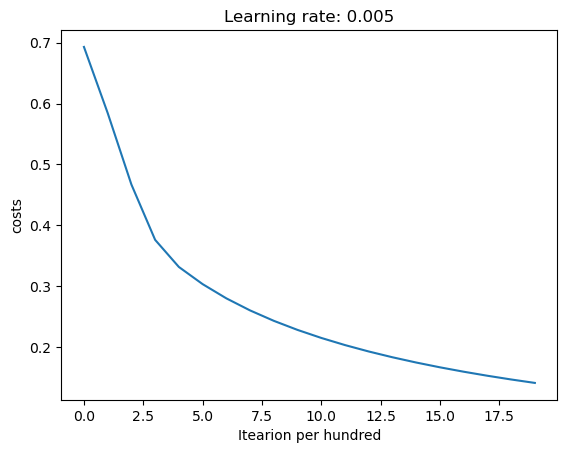

In [124]:
#plot cost with gradients

costs = np.squeeze(logistic_regression_model["costs"])
plt.plot(costs)
plt.ylabel("costs")
plt.xlabel("Itearion per hundred")
plt.title("Learning rate: "+ str(logistic_regression_model["learning_rate"]))
plt.show()

**Lets chcek on multiple learning rates**

In [127]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print("Model with {} learning rate".format(lr))
    models[str(lr)] = model(x_train,y_train, x_test, y_test, n_iterations=2000, learning_rate=lr, print_cost=False)
    print("-----------------------------------------------------------------------------\n")


Model with 0.01 learning rate
-----------------------------------------------------------------------------

Model with 0.001 learning rate
-----------------------------------------------------------------------------

Model with 0.0001 learning rate
-----------------------------------------------------------------------------



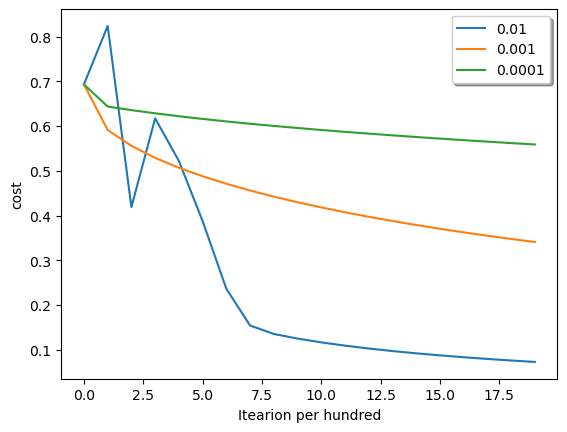

In [137]:
for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel("cost")
plt.xlabel("Itearion per hundred")
legend = plt.legend(loc="upper right", shadow=True)
plt.show()

* learning rate: 0.01 : too high as training diverged without rducing cost
* learning rate: 0.0001 : we can see overfitting here

In [142]:
from PIL import Image

In [144]:
path = r"D:\Data Science\My Deep Learning Lab\Basic Neural Network Creation\Creating Logistic regression in the way of Neural Network\car.jpg"
image = Image.open(path)

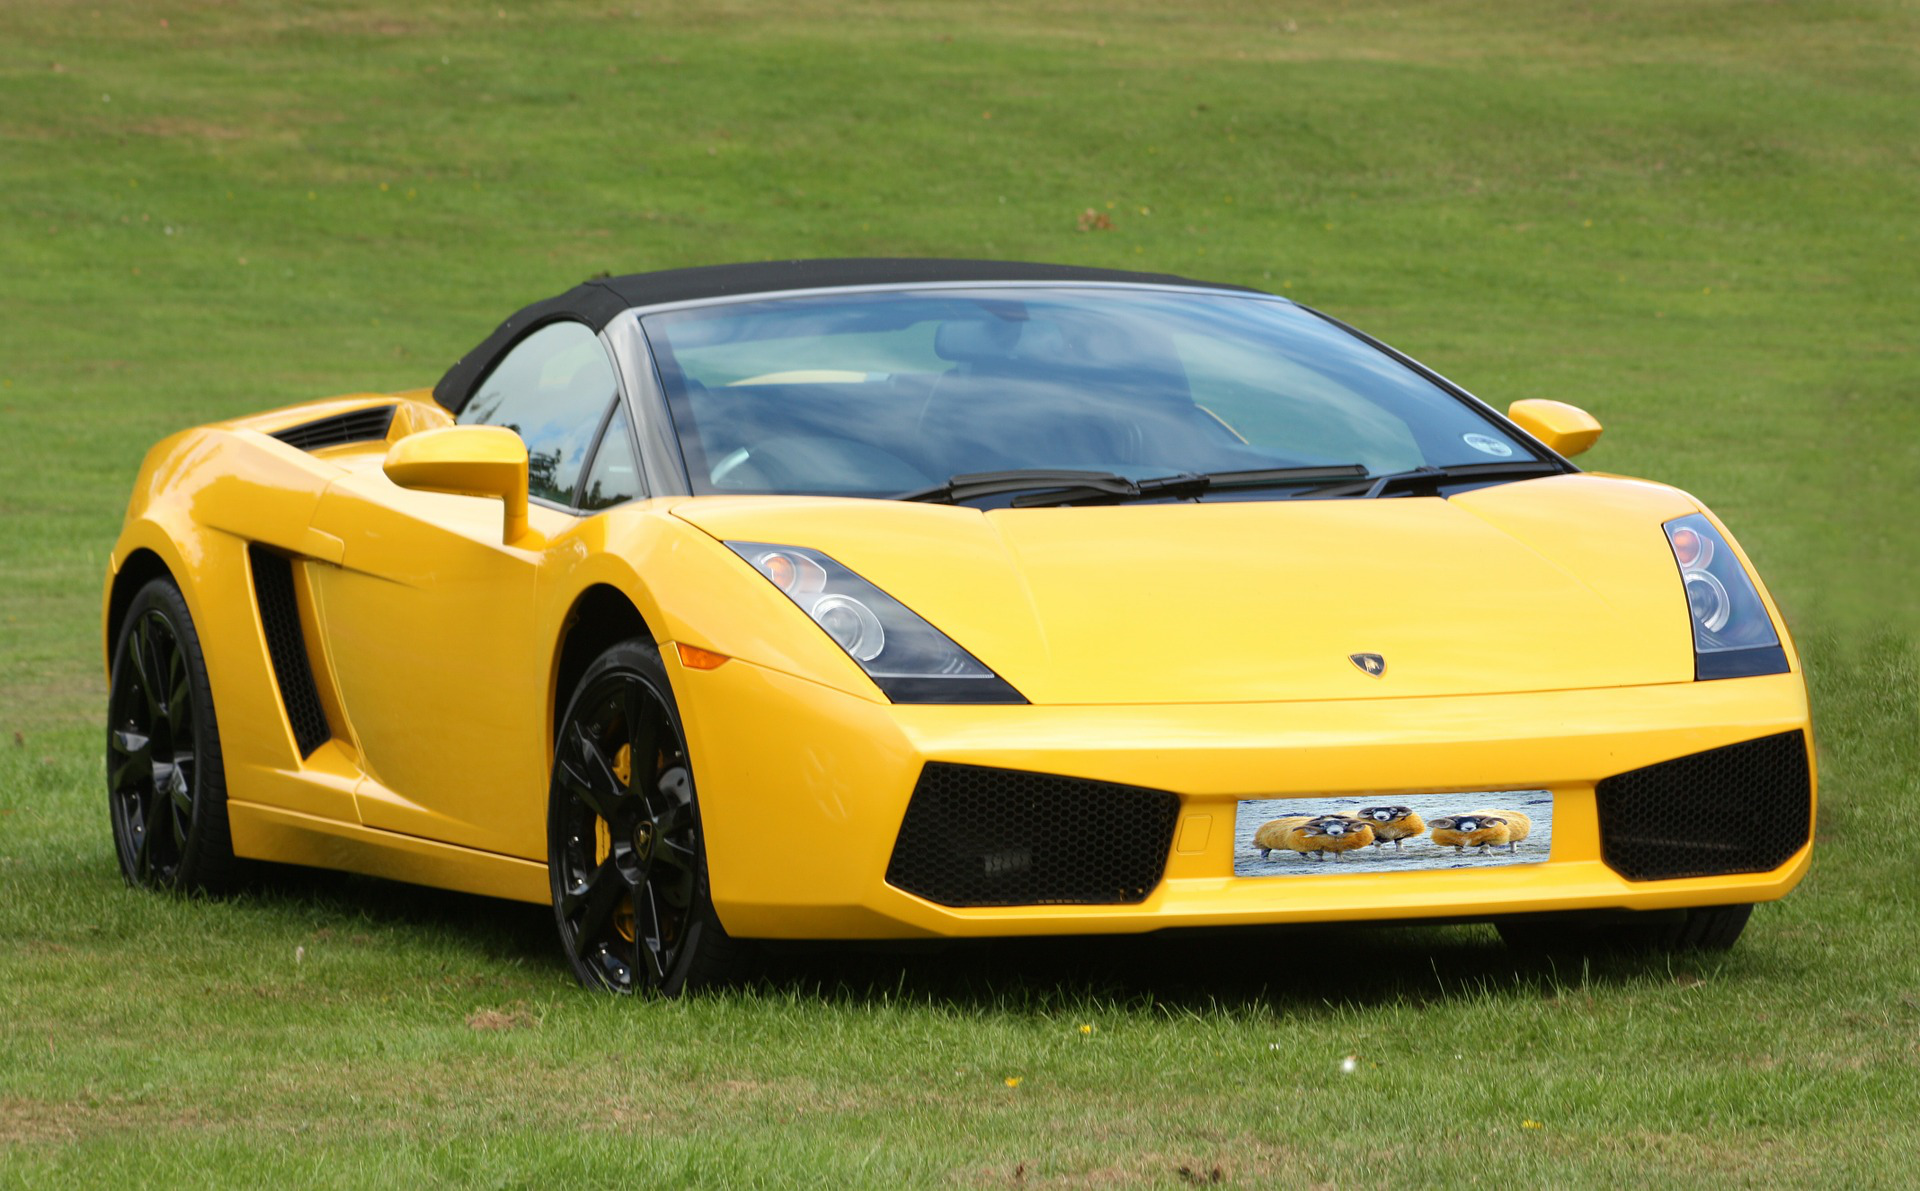

In [145]:
image

In [146]:
image = np.array(image.resize((num_px, num_px)))

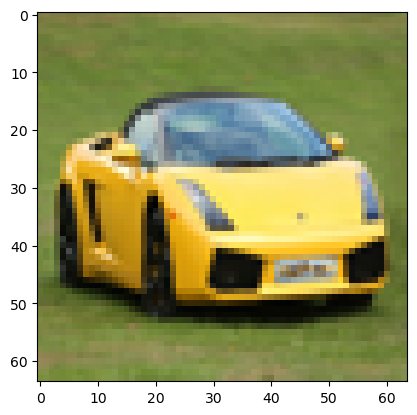

In [147]:
plt.imshow(image)

In [148]:
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

In [155]:
my_predicted_image = predict(image, logistic_regression_model["w"], logistic_regression_model["b"])

In [158]:
str(np.squeeze(my_predicted_image))

'0.0'